Allstate 1B Project

References:

https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python

In [1]:
# Import libraries (use pip install <library> if needed)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data (files are in data folder)
filepath = r"C:\Users\Tahia1\OneDrive\Documents\BreakThroughTech\allstate_1b_data\claims_data.csv"
df = pd.read_csv(filepath)

# Basic EDA and Initial Inspection


In [3]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
df.shape

(188318, 132)

### Target Variable Distribution
Analyze target variable distribution (loss value). Financial data is often highly skewed.

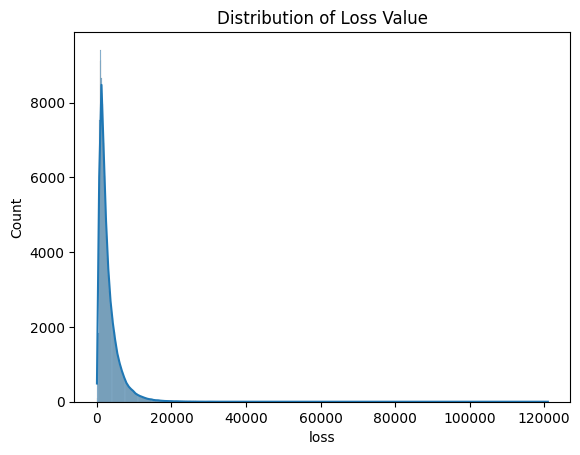

In [5]:
sns.histplot(df['loss'], kde = True)
plt.title("Distribution of Loss Value")
plt.show()

The loss value is right skewed, it has its tail stretching to the right indicating that most data points are concentrated on the left side.

This long tail stretching to the right is a problem for our model, because
- Outliers have too much influence and could cause the model to overfit.
- Models perform best when variables are normally distributed.

Since the data is skewed, the solution is:
- Transform the target, an effective transformation is logarithm.

Why logarithm?
- It compacts the large values much more than smaller values.
- Leads to a more normal distribution (The model will perform better with this.)

In [6]:
# create new column for the log-transformed target
df['log_loss'] = np.log1p(df['loss'])

# **Note**: The `np.log1p()` function computes `log(1+x)`, which is useful if your `loss` column contains zeros.

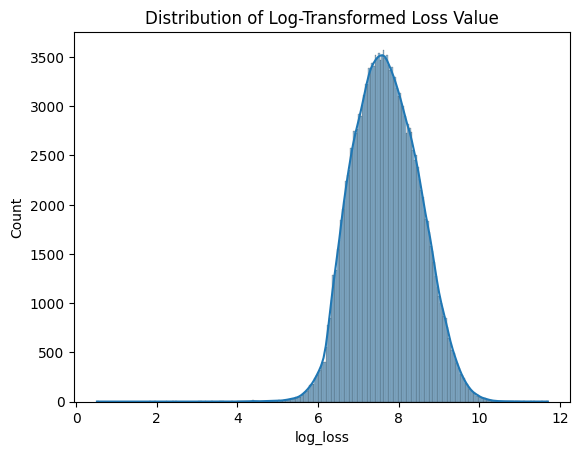

In [7]:
# Visualize the new transformed distribution
sns.histplot(df['log_loss'], kde='True')
plt.title('Distribution of Log-Transformed Loss Value')
plt.show()

The 'log_loss' column has a normal distribution as shown above, hence 'log_loss' shall be our target variable.

Why?
- Because model will perform better with normal distributed data.

### Feature Analysis & Heatmap

Heatmap
- Helps spot features that are highly correlated with the target variable.
- Helps spot features that are highly correlated with each other (multicolinearity)

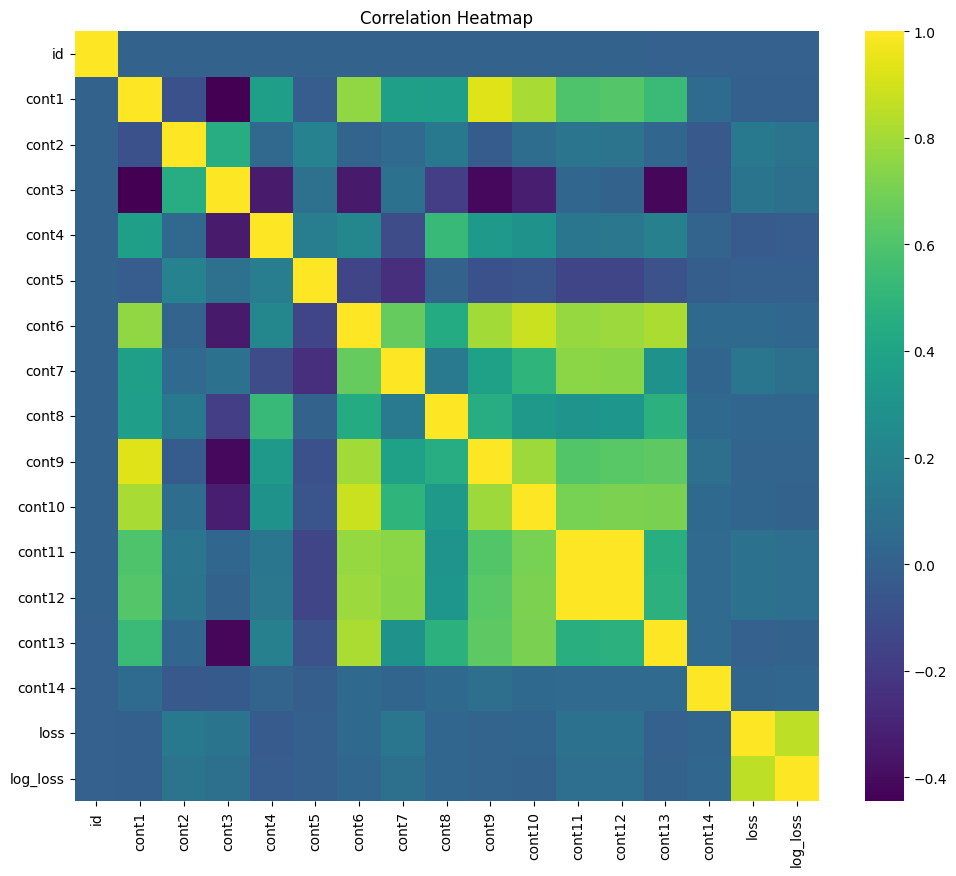

In [8]:
# calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='viridis', annot=False)
plt.title("Correlation Heatmap")
plt.show()

**What does this heatmap mean?**

## Categorical Feature Analysis (cat88 - cat105)

In [ ]:
# select categorical columns from cat88-cat105
categorical_features = df.loc[:,'cat88':'cat105']
categorical_features.head(3)

,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105
0,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E
1,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E
2,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F


Check cardinality (number of unique data in each column), high cardinality can sometimes be challenging for a model.

In [16]:
categorical_features.nunique()

cat88      4
cat89      8
cat90      7
cat91      8
cat92      7
cat93      5
cat94      7
cat95      5
cat96      8
cat97      7
cat98      5
cat99     16
cat100    15
cat101    19
cat102     9
cat103    13
cat104    17
cat105    20
dtype: int64

This isn't bad at all, the cardinality is quite low. (Because there's like 20 unique data compared to thousands of rows.)

### Categorical Feature Analysis with Boxplot

- We want to see if the distribution of the loss value changes across different categories of the feature.

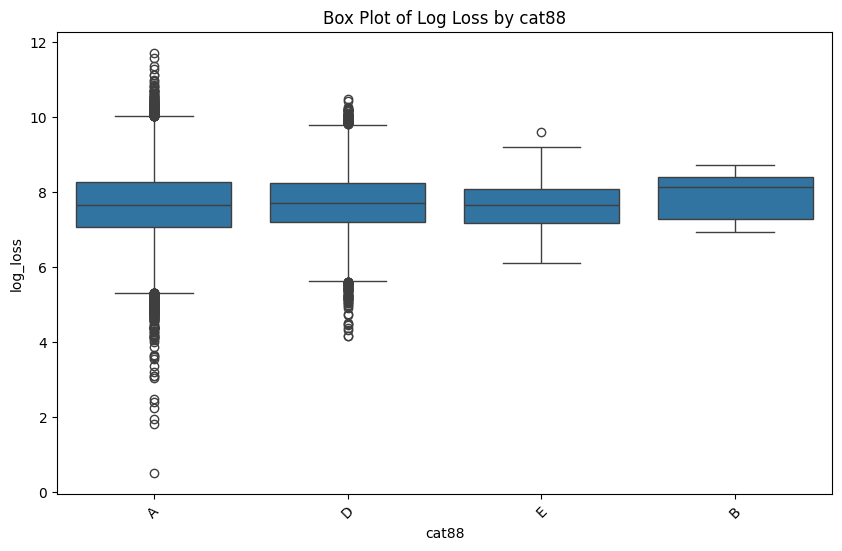

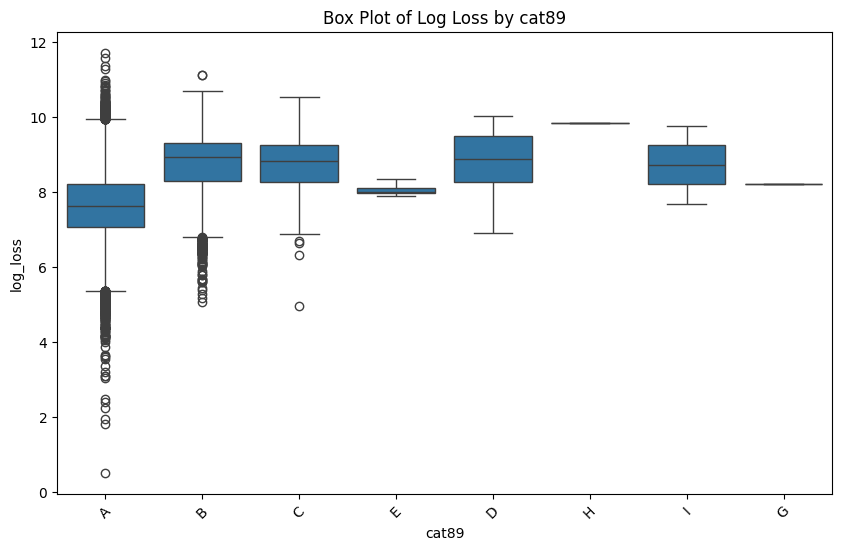

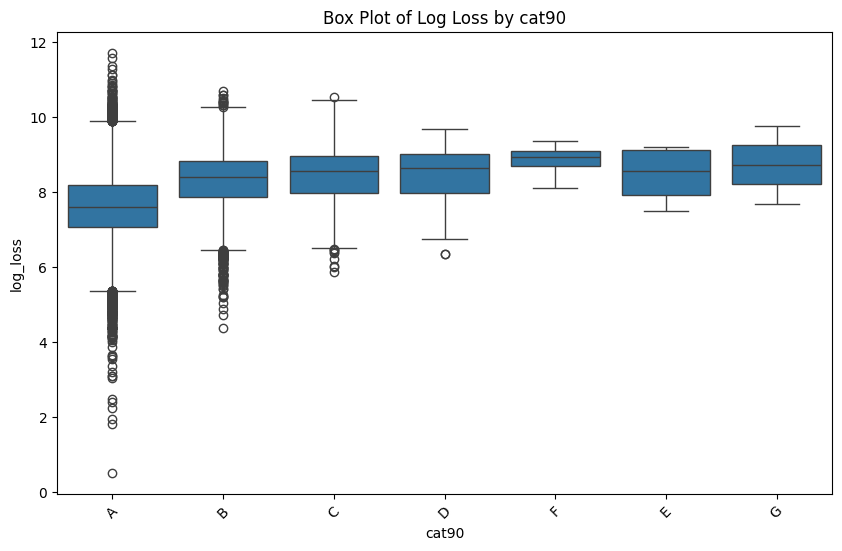

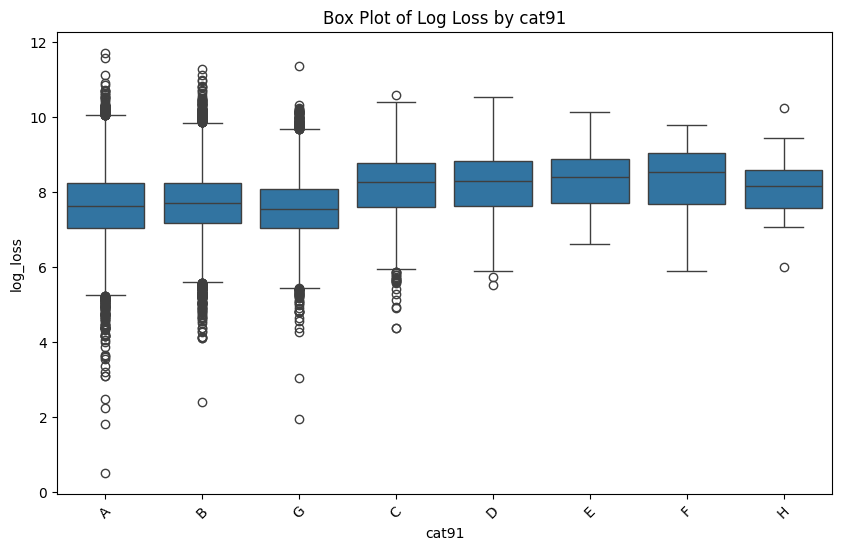

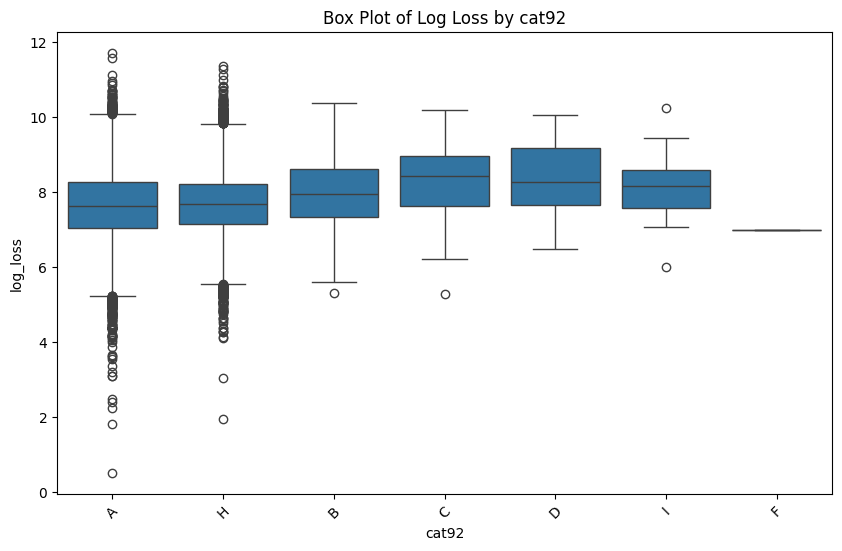

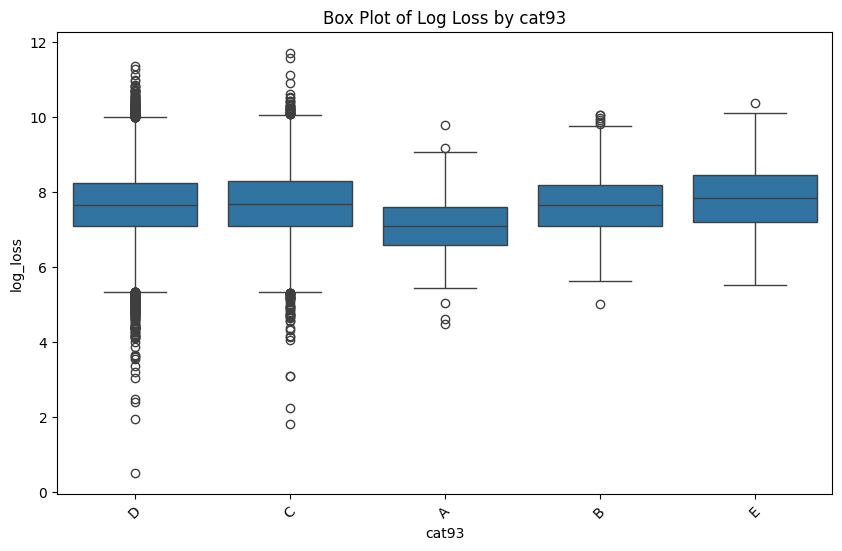

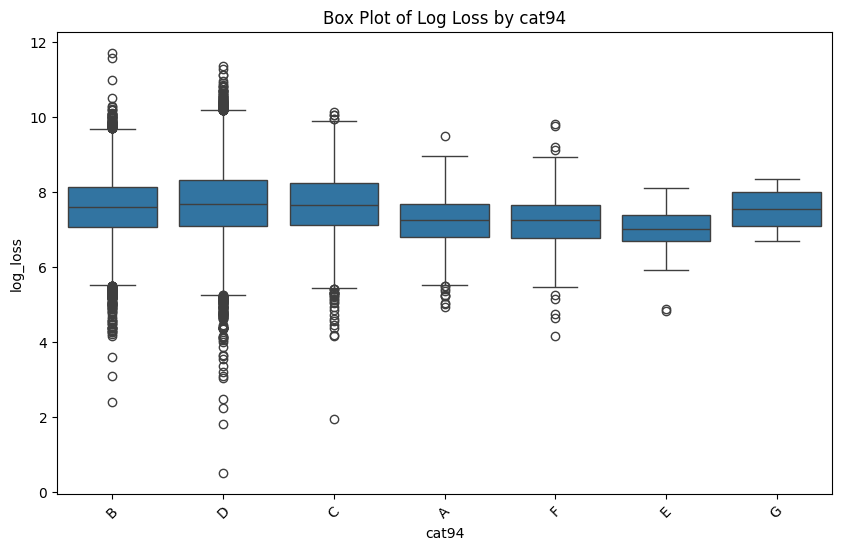

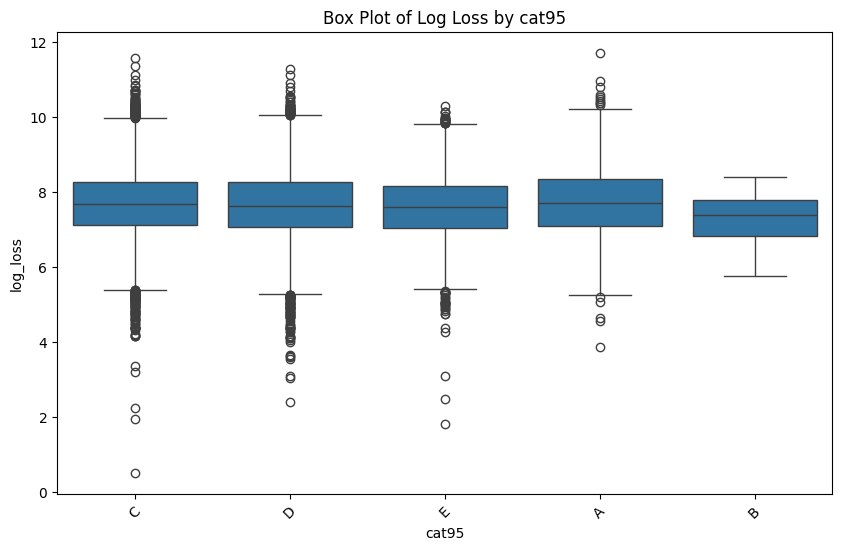

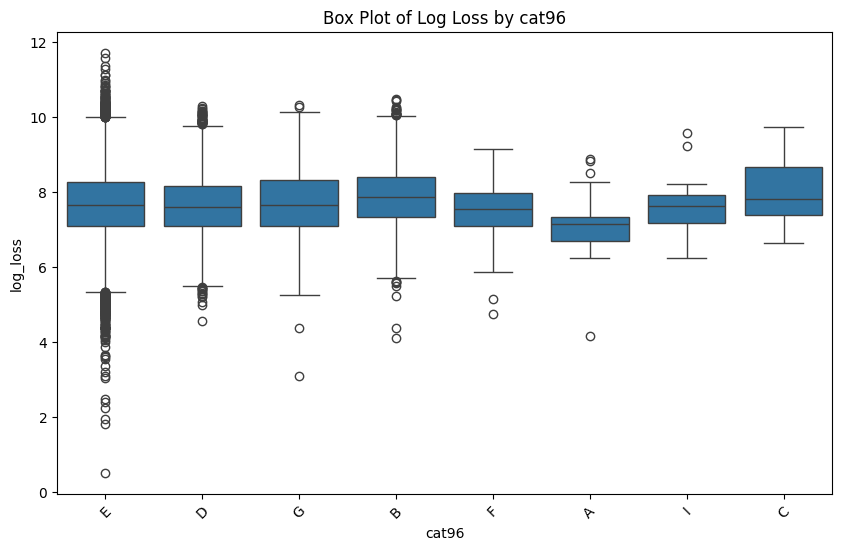

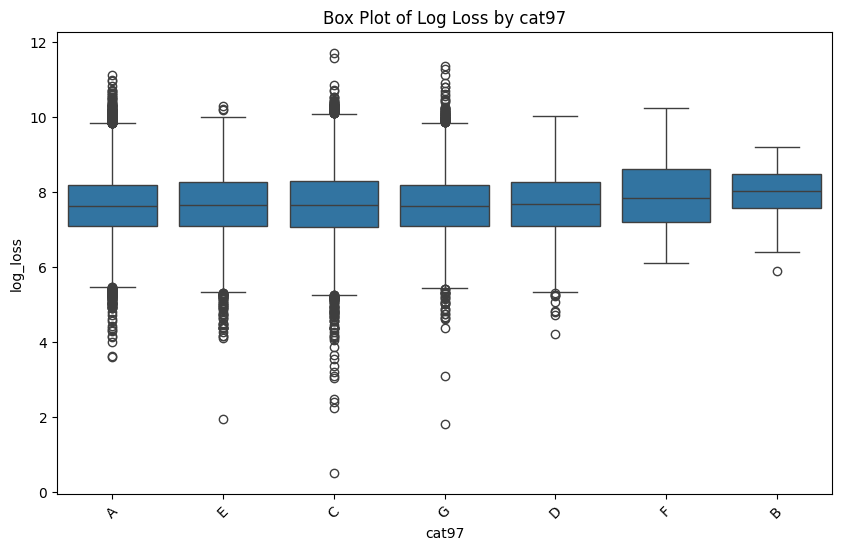

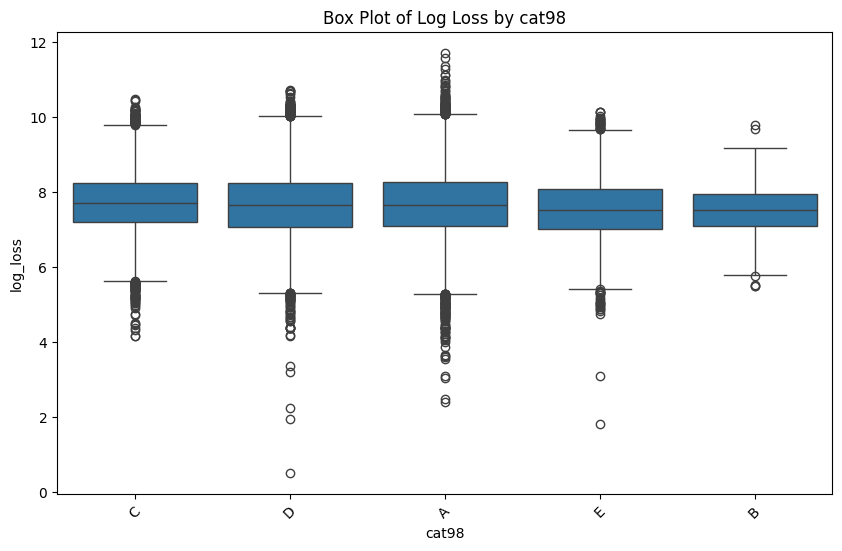

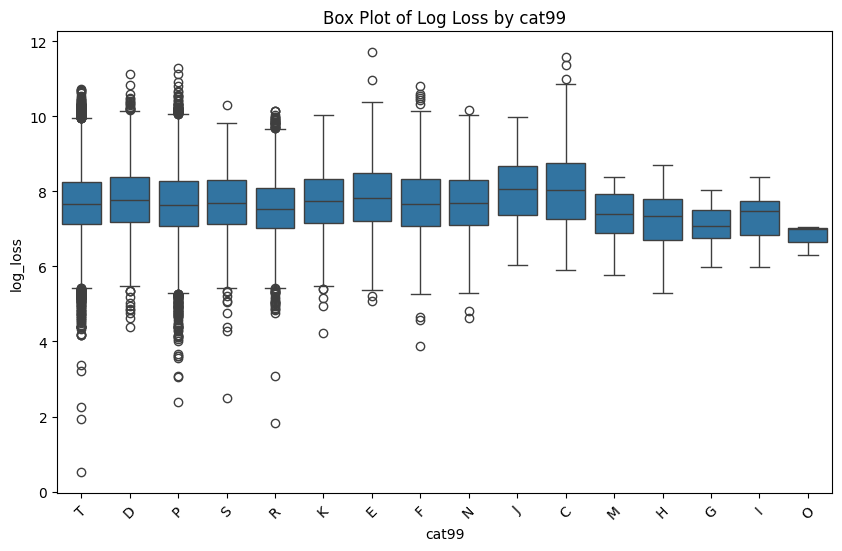

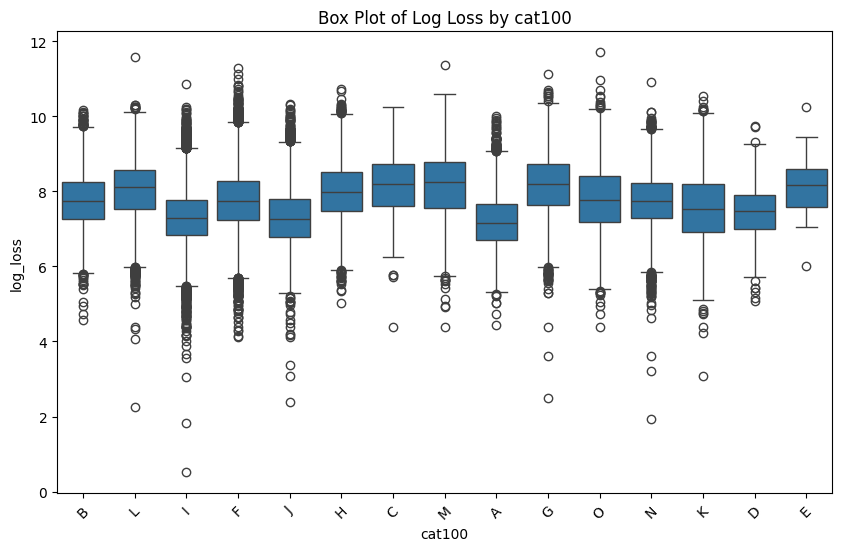

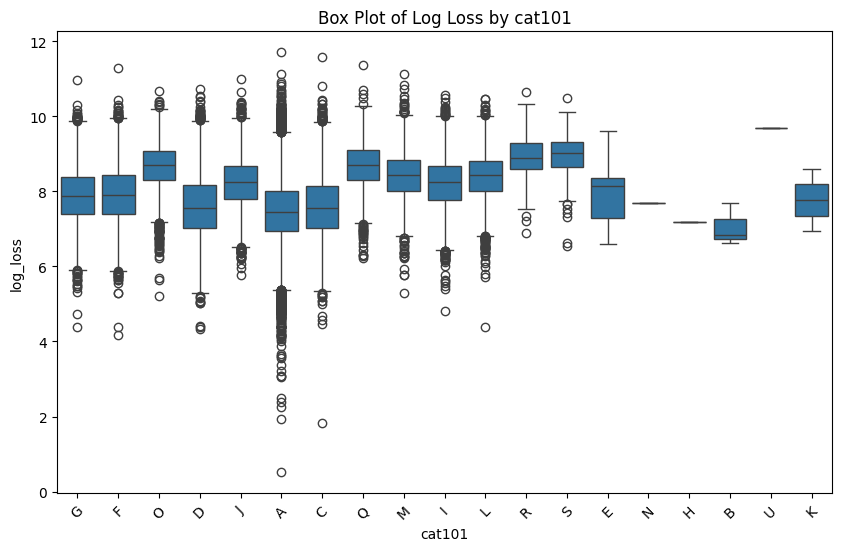

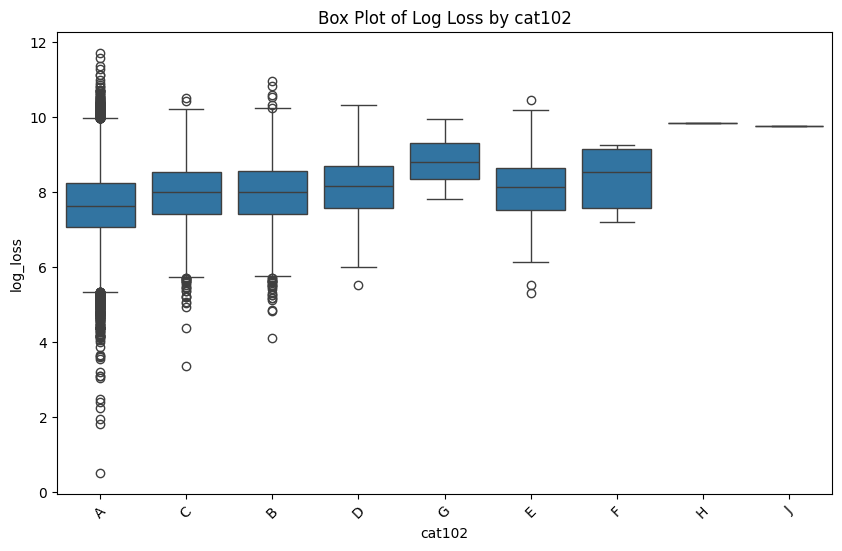

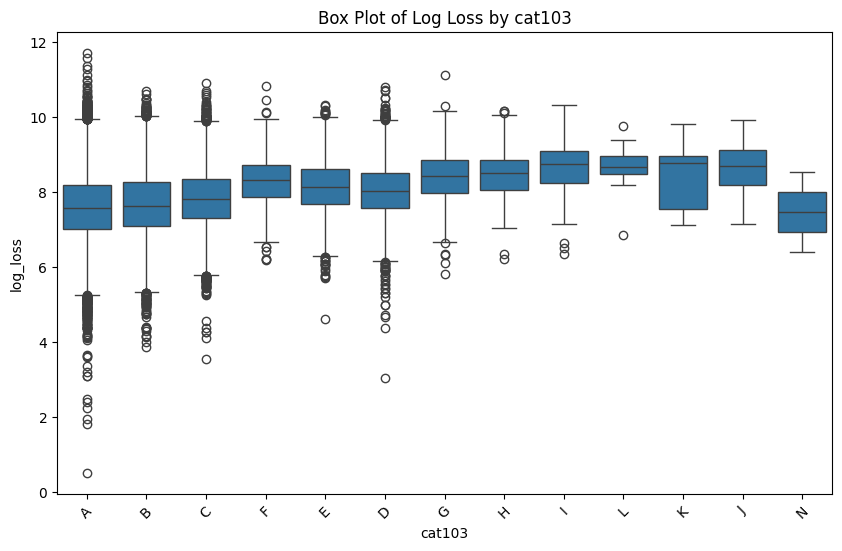

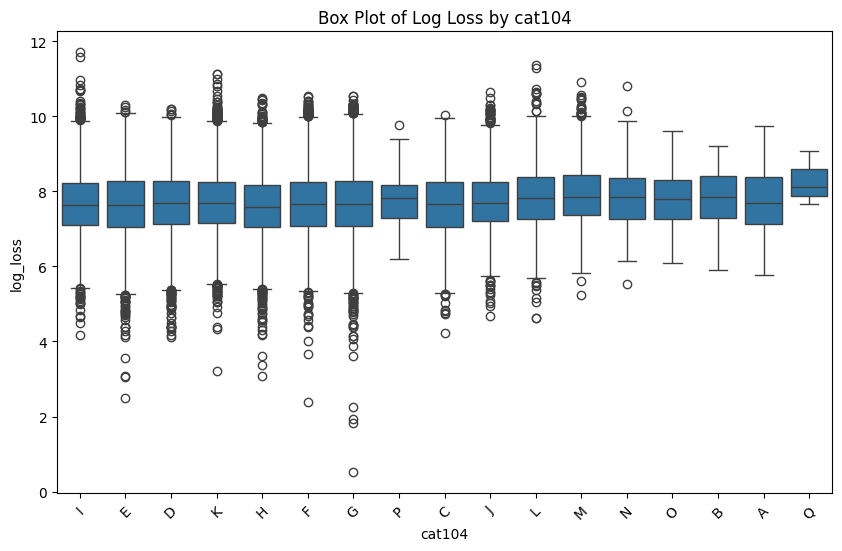

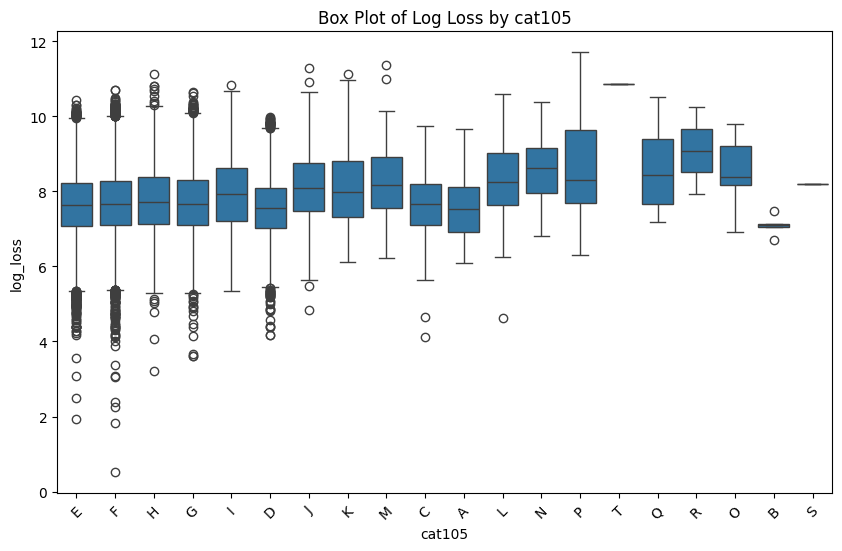

In [19]:
# create a box plot for each categorical feature against the log_loss
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=feature, y='log_loss', data=df)
    plt.title(f"Box Plot of Log Loss by {feature}")
    plt.xticks(rotation=45)
    plt.show()
